In [4]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 677 µs (started: 2024-03-01 19:01:47 +03:00)


In [5]:
# ! kaggle datasets download -d cashutosh/gender-classification-dataset

time: 25.9 ms (started: 2024-03-01 19:01:47 +03:00)


In [6]:
from zipfile import ZipFile

base_dir = './gender-classification-dataset.zip'
with ZipFile(base_dir, mode='r') as zip:
    zip.extractall()
    print(f'{str(base_dir)} is extracted')
    

./gender-classification-dataset.zip is extracted
time: 8.44 s (started: 2024-03-01 19:01:47 +03:00)


In [7]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import models, layers, losses

2024-03-01 19:01:58.969380: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-01 19:01:58.969457: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-01 19:01:59.088128: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-01 19:01:59.341726: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-01 19:02:01.794746: W tensorflow/compiler/tf2

time: 9.87 s (started: 2024-03-01 19:01:55 +03:00)


In [103]:
IMG_HIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 32
EPOCHS = 35

time: 639 µs (started: 2024-03-01 22:58:18 +03:00)


In [9]:
train_ds_path = './Training/'
valid_ds_path = './Validation/'

time: 12 ms (started: 2024-03-01 19:02:05 +03:00)


In [10]:
gender_class = []
x = 0
for i in os.listdir(train_ds_path):
    print(i, ' ', len(os.listdir(train_ds_path + i)))
    x = x + len(os.listdir(train_ds_path + i))
    gender_class.append(i)
print(f'The total images in training folder: {x}')

female   23243
male   23766
The total images in training folder: 47009
time: 49.4 ms (started: 2024-03-01 19:02:05 +03:00)


In [11]:
gender_class

['female', 'male']

time: 8.55 ms (started: 2024-03-01 19:02:05 +03:00)


In [12]:
x = 0
for i in os.listdir(valid_ds_path):
    print(i, ' ', len(os.listdir(valid_ds_path + i)))
    x = x + len(os.listdir(valid_ds_path + i))
print(f'The total images in validation folder: {x}')

female   5841
male   5808
The total images in validation folder: 11649
time: 41.3 ms (started: 2024-03-01 19:02:05 +03:00)


In [13]:
def show_img(data_path):
    idx_random = random.randrange(100)
    plt.figure(figsize=(12, 12))
    idx = 1
    for i in os.listdir(train_ds_path):
        img = load_img((train_ds_path+i) + '/' + os.listdir(train_ds_path + i)[idx_random])
        plt.subplot(1, 7, idx)
        plt.imshow(img)
        plt.axis('off')
        plt.title(i)
        idx = idx + 1
        

time: 1.17 ms (started: 2024-03-01 19:02:05 +03:00)


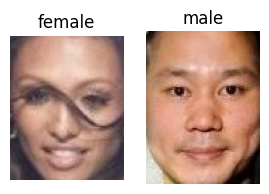

time: 304 ms (started: 2024-03-01 19:02:05 +03:00)


In [14]:
show_img(train_ds_path)

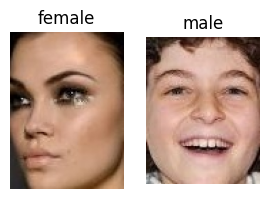

time: 125 ms (started: 2024-03-01 19:02:06 +03:00)


In [15]:
show_img(valid_ds_path)

In [69]:
data_gen_args = dict(rotation_range=90,
                     horizontal_flip=True, 
                     vertical_flip=True,
                     zoom_range=0.2,
                     rescale=(1/255.))


time: 409 µs (started: 2024-03-01 22:10:59 +03:00)


In [70]:
train_gen = ImageDataGenerator(**data_gen_args)
valid_gen = ImageDataGenerator(**data_gen_args )

time: 611 µs (started: 2024-03-01 22:11:00 +03:00)


In [71]:
train_ds = train_gen.flow_from_directory(
    directory=train_ds_path,
    target_size=(IMG_HIGHT, IMG_WIDTH),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)

valid_ds = valid_gen.flow_from_directory(
    directory=valid_ds_path,
    target_size=(IMG_HIGHT, IMG_WIDTH),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False,
    seed=42
)

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.
time: 2.83 s (started: 2024-03-01 22:11:00 +03:00)


In [104]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(IMG_HIGHT, IMG_WIDTH, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),

    # layers.Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'),
    # layers.MaxPooling2D(pool_size=(2, 2)),
    # layers.Dropout(0.25),

    layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(gender_class), activation='softmax')
])

time: 119 ms (started: 2024-03-01 22:58:24 +03:00)


In [105]:
model.compile(optimizer='adam', loss=losses.categorical_crossentropy, metrics=['accuracy'])

time: 17.1 ms (started: 2024-03-01 22:58:25 +03:00)


In [106]:
history = model.fit(x=train_ds, validation_data=valid_ds, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/35


2024-03-01 22:58:27.719135: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_11/dropout_45/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1470/1470 [==============================] - 50s 33ms/step - loss: 0.6610 - accuracy: 0.5821 - val_loss: 0.6073 - val_accuracy: 0.6656
Epoch 2/35
1470/1470 [==============================] - 48s 32ms/step - loss: 0.5274 - accuracy: 0.7409 - val_loss: 0.4347 - val_accuracy: 0.8052
Epoch 3/35
1470/1470 [==============================] - 47s 32ms/step - loss: 0.4474 - accuracy: 0.7944 - val_loss: 0.3744 - val_accuracy: 0.8356
Epoch 4/35
1470/1470 [==============================] - 48s 33ms/step - loss: 0.4025 - accuracy: 0.8206 - val_loss: 0.3464 - val_accuracy: 0.8505
Epoch 5/35
1470/1470 [==============================] - 47s 32ms/step - loss: 0.3752 - accuracy: 0.8365 - val_loss: 0.3006 - val_accuracy: 0.8776
Epoch 6/35
1470/1470 [==============================] - 47s 32ms/step - loss: 0.3482 - accuracy: 0.8522 - val_loss: 0.2779 - val_accuracy: 0.8871
Epoch 7/35
1470/1470 [==============================] - 47s 32ms/step - loss: 0.3323 - accuracy: 0.8589 - val_loss: 0.2646 - val_accura

In [ ]:
# Check if the file exists before attempting to delete it
model.save('model.keras')
print('model saved')

In [107]:
test_loss, test_accuracy = model.evaluate(valid_ds, batch_size=BATCH_SIZE)

365/365 [==============================] - 9s 25ms/step - loss: 0.1581 - accuracy: 0.9428
time: 9.35 s (started: 2024-03-01 23:36:50 +03:00)


In [108]:
print(f'Test Accuracy:  {test_accuracy*100:.1f}%')
print(f'Test Loss: {test_loss*100:.1f}%')

Test Accuracy:  94.3%
Test Loss: 15.8%
time: 542 µs (started: 2024-03-01 23:37:03 +03:00)


In [109]:
import time
idx_random = random.randrange(100)
idx_random

68

time: 142 ms (started: 2024-03-01 23:37:08 +03:00)


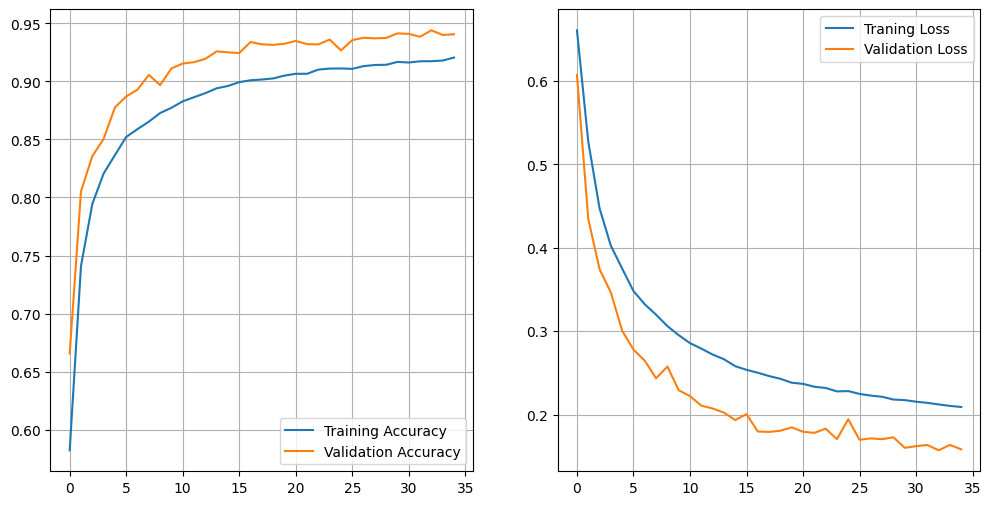

time: 439 ms (started: 2024-03-01 23:37:09 +03:00)


In [110]:
n_epochs = range(EPOCHS)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(n_epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(n_epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(n_epochs, history.history['loss'], label='Traning Loss')
plt.plot(n_epochs, history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.grid()

plt.savefig('result_{}.png'.format(idx_random))


In [90]:
from keras.preprocessing import image

time: 1.28 ms (started: 2024-03-01 22:54:32 +03:00)


In [111]:
def predict_img(path, data_class):
    img = tf.keras.utils.load_img(path, target_size=(IMG_HIGHT, IMG_WIDTH))
    img_gray_scale = tf.image.rgb_to_grayscale(img)
    input_array = tf.keras.utils.img_to_array(img_gray_scale)
    input_img = tf.expand_dims(input_array, 0)
    pred = model.predict(input_img)
    result = tf.nn.softmax(pred[0])
    return gender_class[np.argmax(result)]

time: 599 µs (started: 2024-03-01 23:37:20 +03:00)


In [112]:
path = './istockphoto-1300972573-612x612.jpg'

time: 592 µs (started: 2024-03-01 23:37:21 +03:00)


In [113]:
predict_img(path, data_class=gender_class)

1/1 [==============================] - 0s 94ms/step


'male'

time: 164 ms (started: 2024-03-01 23:37:22 +03:00)
